# Covid19 - Real Time Monitoring and Analysis
## Realtime data from Folkhälsomyndigheten
Datafile source:
https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data

Realtime data from Folkhalsomyndigheten
https://experience.arcgis.com/experience/09f821667ce64bf7be6f9f87457ed9aa

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})
sns.set_palette("deep", desat=0.5)
sns.set_style("darkgrid")
base_color = sns.color_palette()[0]
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [122]:
xls = pd.ExcelFile('https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data')
data = pd.read_excel(xls, 'Antal per dag region')
data2 = pd.read_excel(xls, 'Antal avlidna per dag')

#data = pd.read_excel('https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data')

# How does the data looks like?

In [108]:
# Data privided by Folkhälsomyndigheten
data.head(10)

,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,2020-02-04,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-02-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-02-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020-02-12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-02-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 23 columns):
Statistikdatum         63 non-null datetime64[ns]
Totalt_antal_fall      63 non-null int64
Blekinge               63 non-null int64
Dalarna                63 non-null int64
Gotland                63 non-null int64
Gävleborg              63 non-null int64
Halland                63 non-null int64
Jämtland_Härjedalen    63 non-null int64
Jönköping              63 non-null int64
Kalmar                 63 non-null int64
Kronoberg              63 non-null int64
Norrbotten             63 non-null int64
Skåne                  63 non-null int64
Stockholm              63 non-null int64
Sörmland               63 non-null int64
Uppsala                63 non-null int64
Värmland               63 non-null int64
Västerbotten           63 non-null int64
Västernorrland         63 non-null int64
Västmanland            63 non-null int64
Västra_Götaland        63 non-null int64
Örebro                 63 n

In [110]:
# Check if there are any empty cells without values
data.isnull().sum()

Statistikdatum         0
Totalt_antal_fall      0
Blekinge               0
Dalarna                0
Gotland                0
Gävleborg              0
Halland                0
Jämtland_Härjedalen    0
Jönköping              0
Kalmar                 0
Kronoberg              0
Norrbotten             0
Skåne                  0
Stockholm              0
Sörmland               0
Uppsala                0
Värmland               0
Västerbotten           0
Västernorrland         0
Västmanland            0
Västra_Götaland        0
Örebro                 0
Östergötland           0
dtype: int64

### Number of Days and Regions recorded

In [111]:
days = data.shape[0]
regions = data.shape[1] 

print ("Total number of days recorded: {}".format(days))
print ("Number of regions: {}".format(regions))


Total number of days recorded: 63
Number of regions: 23


### Count, Mean and Standard Deviations by Region

In [112]:
data.describe()

,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,114.380952,0.571429,2.952381,0.190476,2.888889,2.079365,1.428571,3.698413,0.825397,0.841270,...,49.888889,7.174603,4.888889,0.904762,1.952381,1.079365,2.825397,9.603175,2.746032,11.031746
std,156.249328,1.304017,5.638086,0.618457,5.591212,3.423362,2.680360,6.752861,1.420355,1.588328,...,68.371639,14.612787,8.018348,1.811382,3.807584,2.357566,5.920276,13.029173,5.596566,17.824384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,166.000000,0.000000,3.000000,0.000000,3.500000,3.000000,2.000000,4.000000,1.000000,1.000000,...,68.500000,6.000000,7.500000,1.000000,2.500000,1.000000,3.000000,16.500000,3.000000,15.500000
max,601.000000,6.000000,22.000000,4.000000,30.000000,16.000000,14.000000,32.000000,6.000000,7.000000,...,247.000000,60.000000,38.000000,11.000000,17.000000,13.000000,27.000000,57.000000,28.000000,71.000000


### Correlation > Region - Number of cases
[Description]

In [113]:
# Create a data correlation dataframe:
corr_df_master = data.corr()
corr_target = corr_df_master.iloc[0][:] # The correlation target is the 'Totalt_antal_fall' column 
corr = corr_target.sort_values(ascending=True)
corr_df = pd.DataFrame(corr)
corr_df.reset_index(level=0, inplace=True)
corr_df.columns = ['features', 'correlation']
corr_df

,features,correlation
0,Värmland,0.176621
1,Gotland,0.287323
2,Jämtland_Härjedalen,0.348446
3,Skåne,0.401244
4,Blekinge,0.591428
5,Västernorrland,0.634582
6,Kronoberg,0.707864
7,Halland,0.717294
8,Örebro,0.776998
9,Kalmar,0.787971


### Correlations - Linear View

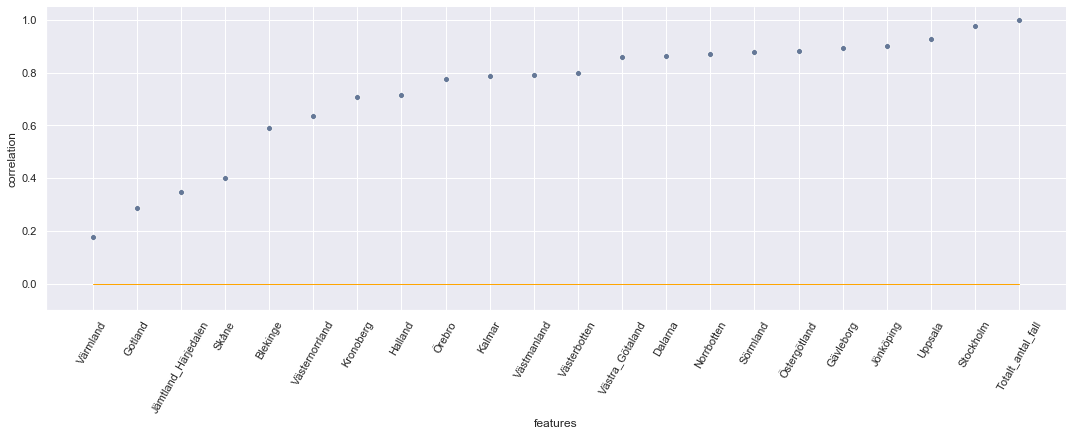

In [114]:
sns.relplot(x='features', y='correlation', data=corr_df, aspect=3)
plt.ylim([-0.1, 1.05]) 
plt.xticks(rotation=60);

# Correlation reference line at y=0
f = len(corr_df.features) -1
plt.plot([0, f], [0, 0], linewidth=1, c='orange');


### Distribution of Correlations
[Description]

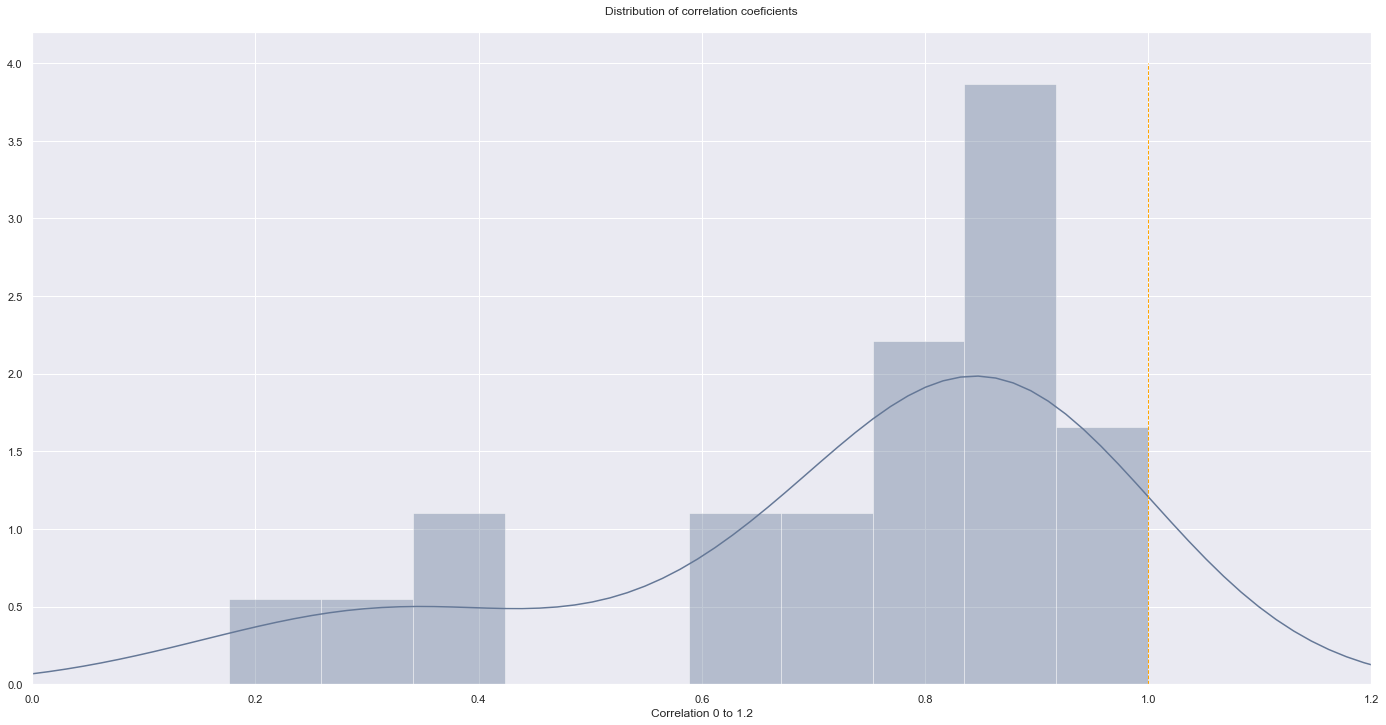

In [115]:
# Observing the distribution of correlation coeficients
fig, ax = plt.subplots(figsize=(24, 12))
sns.distplot(corr_df.correlation, kde=True, bins = 10, ax=ax)
plt.xlim([0, 1.2])
plt.xlabel('Correlation 0 to 1.2')
ax.set_title("Distribution of correlation coeficients\n");

# Correlation reference line at x=1
plt.plot([1, 1], [0, 4], linewidth=1, c='orange', linestyle='--');

# Affected Cases

### Cases Totals

In [129]:
# Total number of cases
data['Totalt_antal_fall'].sum()

7206

In [131]:
# Mean of cases/region
data['Totalt_antal_fall'].mean()

114.38095238095238

### Amount of Cases by Day

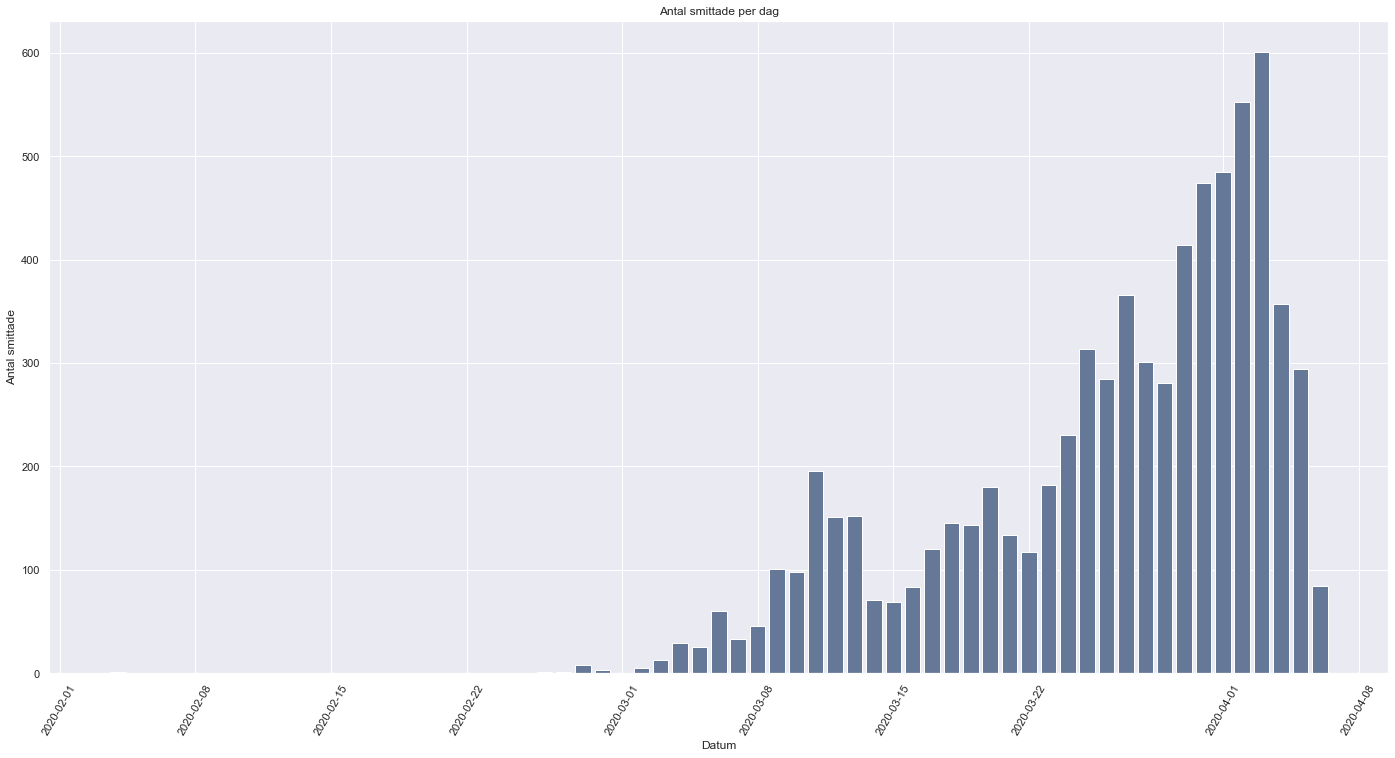

In [125]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(24, 12))

# Add x-axis and y-axis
ax.bar(data.Statistikdatum.values,
       data['Totalt_antal_fall'])

# Set title and labels for axes
ax.set(xlabel="Datum",
       ylabel="Antal smittade",
       title="Antal smittade per dag")
plt.xticks(rotation=60);
plt.show()

In [117]:
# For the next step we create a subset with only regions as columns. We call it "region"
region = data.iloc[:, 2:]
region

,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,Norrbotten,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3,6,0,17,9,3,32,5,7,8,...,215,34,28,0,12,1,18,48,28,71
59,1,20,0,16,12,2,29,2,2,6,...,247,59,38,1,17,3,27,46,21,28
60,4,18,0,12,2,2,15,1,2,3,...,131,17,11,1,17,6,14,30,1,58
61,1,0,0,7,3,0,1,2,2,0,...,172,9,9,1,9,1,7,23,0,41


In [118]:
# Columns in the dataset "region"
region.columns.tolist()

['Blekinge',
 'Dalarna',
 'Gotland',
 'Gävleborg',
 'Halland',
 'Jämtland_Härjedalen',
 'Jönköping',
 'Kalmar',
 'Kronoberg',
 'Norrbotten',
 'Skåne',
 'Stockholm',
 'Sörmland',
 'Uppsala',
 'Värmland',
 'Västerbotten',
 'Västernorrland',
 'Västmanland',
 'Västra_Götaland',
 'Örebro',
 'Östergötland']

In [119]:
days = region.shape[0]
regions = region.shape[1] 

print ("Total number of days recorded: {}".format(days))
print ("Number of regions: {}".format(regions))

Total number of days recorded: 63
Number of regions: 21


### Amount of Cases by Region


In [120]:
region = region.sum(axis = 0, skipna = True) 
region = pd.DataFrame(region)
region.reset_index(level=0, inplace=True)
region.columns = ['region', 'cases']
region = region.sort_values(by='cases', ascending=False)
region

,region,cases
11,Stockholm,3143
20,Östergötland,695
18,Västra_Götaland,605
12,Sörmland,452
10,Skåne,348
13,Uppsala,308
6,Jönköping,233
1,Dalarna,186
3,Gävleborg,182
17,Västmanland,178


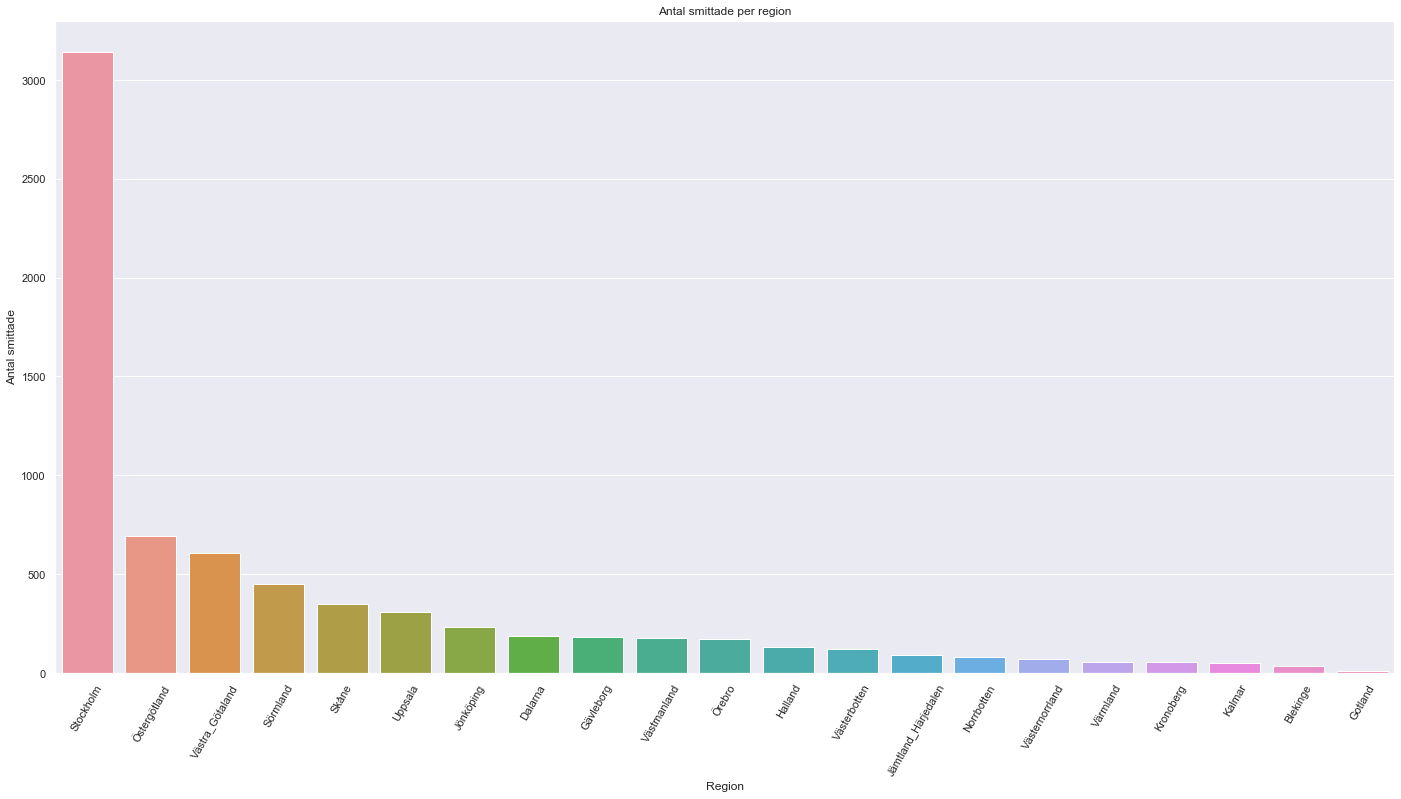

In [121]:
fig, ax = plt.subplots(figsize=(24, 12))
ax = sns.barplot(x="region", y="cases", data=region)
ax.set(xlabel="Region",
       ylabel="Antal smittade",
       title="Antal smittade per region")
plt.xticks(rotation=60);

### Amount of deaths by Day


In [126]:
data2.head()

,Datum_avliden,Antal_avlidna
0,2020-03-11,1
1,2020-03-12,0
2,2020-03-13,1
3,2020-03-14,1
4,2020-03-15,2


# Death Cases

### Deaths totals

In [123]:
data2.columns.tolist()

['Datum_avliden', 'Antal_avlidna']

In [132]:
# Total number of deaths
data2['Antal_avlidna'].sum()

477

In [133]:
# Mean of deaths/region
data2['Antal_avlidna'].mean()

17.035714285714285

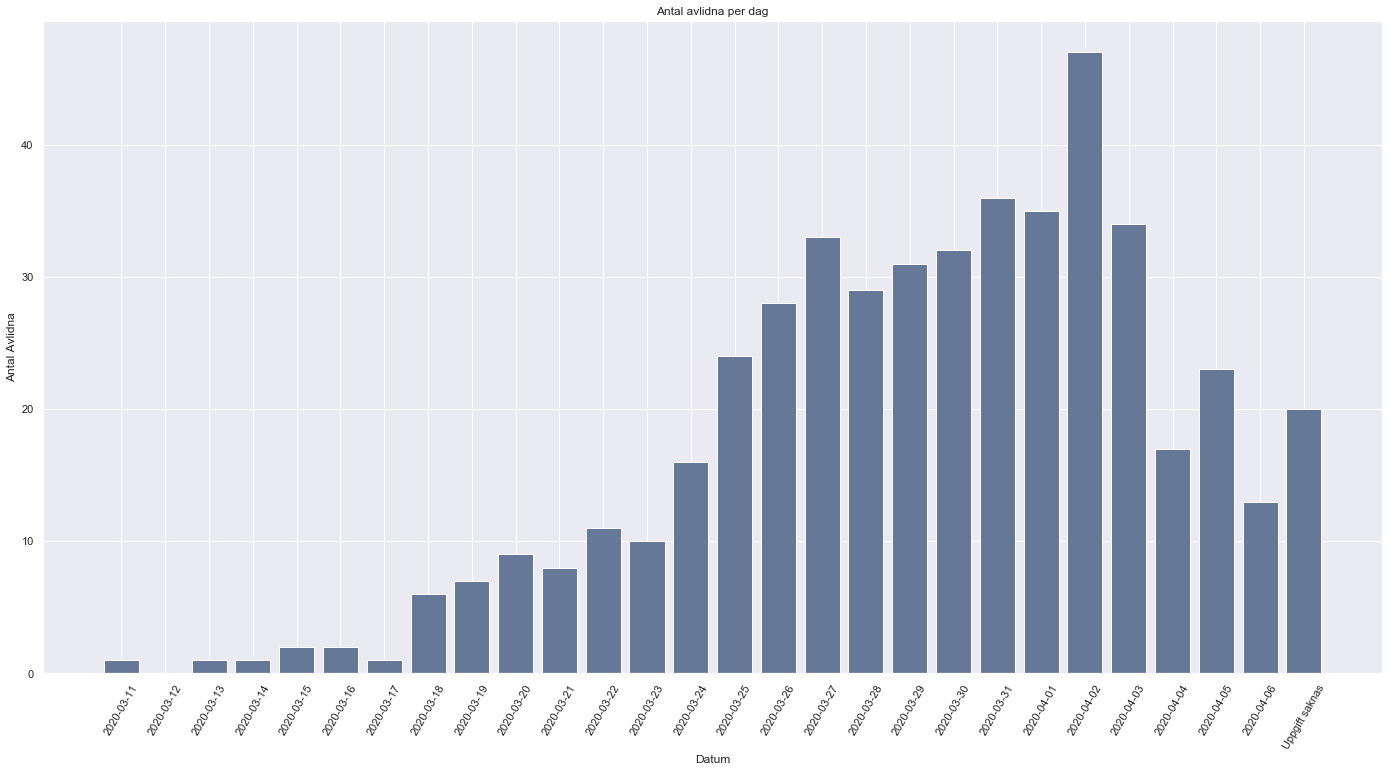

In [124]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(24, 12))

# Add x-axis and y-axis
ax.bar(data2.Datum_avliden.values,
       data2['Antal_avlidna'])

# Set title and labels for axes
ax.set(xlabel="Datum",
       ylabel="Antal Avlidna",
       title="Antal avlidna per dag")
plt.xticks(rotation=60);
plt.show()